# Core 4.2 Batch Pipelines - Kubeflow Pipelines

In this section, we will execute the pipeline we created in the last section using Kubeflow Pipelines. Iguazio includes a managed version of Kubeflow Pipelines that comes pre-installed and is tightly integrated with the rest of the platform.

---

### References

Much of the following content is derived from the official documenation:
- [Project workflows and automation](https://docs.mlrun.org/en/latest/projects/workflows.html)

### Example Overview

In this example, we will execute the pipeline we created last time via Kubeflow Pipelines. To run the pipeline, we will use the MLRun Project object. The project knows where the underlying files for the pipeline and functions are, making it very simple to run via the Python SDK or CLI.

---

### Setup

In [14]:
import mlrun

project = mlrun.get_or_create_project("iguazio-academy", context="./")

> 2022-06-23 20:34:26,599 [info] loaded project iguazio-academy from MLRun DB


### List Pipelines in Project

Recall that we saved our pipeline in the project under the name `train`

In [24]:
project.workflows

[{'name': 'train', 'path': 'pipelines/training_pipeline.py', 'engine': None}]

### Run Pipeline via Python SDK

The default behavior of the pipeline is to run using Kubeflow Pipelines so we do not need to explicitly specify the engine

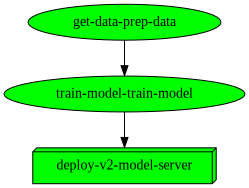

uid,start,state,name,parameters,results
...70a0ace2,Jun 23 20:54:16,completed,train-model-train_model,label_column=targettest_size=0.2,accuracy=1.0f1_score=1.0precision_score=1.0recall_score=1.0auc-micro=1.0auc-macro=1.0auc-weighted=1.0
...09092e38,Jun 23 20:54:03,completed,get-data-prep_data,label_column=target,num_rows=150


febf2730-17ad-467d-a63b-5e7cd4711a0b

In [28]:
run_id = project.run(
    name="train",
    arguments={'label_column': 'target', 'test_size' : 0.2}, # Arguments in Key Value format
    sync=True, # Get latest versions of all MLRun functions before running,
    watch=True # Wait for pipeline to execute before continuing (prints out graph)
)

### Run Pipeline via CLI

Like the Python SDK, the CLI has many options for running projects. The CLI is often used in CI/CD pipelines rather than the Python SDK, but that is user preference.

Run `mlrun project --help` for more info. To execute our pipeline, run the following:

In [31]:
!mlrun project ./ --run train --arguments label_column=target --arguments test_size=0.2

Loading project iguazio-academy into ./:

kind: project
metadata:
  name: iguazio-academy
  created: '2022-06-23T19:20:05.968000+00:00'
spec:
  functions:
  - url: functions/get_data.py
    name: get-data
    kind: job
    image: mlrun/mlrun
  - url: functions/train.py
    name: train-model
    kind: job
    image: mlrun/mlrun
  - url: hub://v2_model_server
    name: deploy-model
  workflows:
  - name: train
    path: pipelines/training_pipeline.py
    engine: null
  artifacts: []
  source: ''
  desired_state: online
  owner: xingsheng
status:
  state: online

running workflow train file: None
Missing type name was inferred as "Float" based on the value "0.2".
> 2022-06-23 20:58:00,101 [info] submitted pipeline iguazio-academy-train 2022-06-23 20-57-59 id=d9ee0305-1b92-47bf-8fe9-137eb7704d31
> 2022-06-23 20:58:00,101 [info] Pipeline run id=d9ee0305-1b92-47bf-8fe9-137eb7704d31, check UI for progress
Pipeline started in project iguazio-academy id=d9ee0305-1b92-47bf-8fe9-137eb7704d31, che

---